In [1]:
import pandas as pd
import numpy as np
import igraph as ig
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from ipysigma import Sigma
import matplotlib.pyplot as plt
import spacy
import os
from tqdm import tqdm

In [2]:
#Importation des documents - fonction
def ouverture_documents(chemin_dossier): 

    liste_fichiers= os.listdir(chemin_dossier)
    liste_retour=[]
    for fichier in tqdm(liste_fichiers) :
        with open(os.path.join(chemin_dossier,fichier),'r',encoding="utf-8") as texte:
            seance=texte.read()
        liste_retour.append(seance)
    return liste_retour

In [3]:
#Importation des documents - exécution
chemin = "../ocr_sorted/"
liste_desdocs = ouverture_documents(chemin)

100%|██████████| 7461/7461 [02:45<00:00, 45.21it/s]


In [4]:
#Importation des documents - fonction
def ouverture_documents_fichier(chemin_dossier): 

    liste_fichiers= os.listdir(chemin_dossier)
    
    return liste_fichiers

In [5]:
liste_desfichiers = ouverture_documents_fichier(chemin)
liste_desfichiers

['1881-01-11.txt',
 '1881-01-20.txt',
 '1881-01-21.txt',
 '1881-01-21_1.txt',
 '1881-01-22.txt',
 '1881-01-24.txt',
 '1881-01-25.txt',
 '1881-01-27.txt',
 '1881-01-31.txt',
 '1881-02-01.txt',
 '1881-02-03.txt',
 '1881-02-05.txt',
 '1881-02-07.txt',
 '1881-02-08.txt',
 '1881-02-10.txt',
 '1881-02-12.txt',
 '1881-02-14.txt',
 '1881-02-15.txt',
 '1881-02-17.txt',
 '1881-02-19.txt',
 '1881-02-21.txt',
 '1881-02-22.txt',
 '1881-02-24.txt',
 '1881-02-26.txt',
 '1881-03-03.txt',
 '1881-03-05.txt',
 '1881-03-07.txt',
 '1881-03-08.txt',
 '1881-03-10.txt',
 '1881-03-12.txt',
 '1881-03-14.txt',
 '1881-03-15.txt',
 '1881-03-17.txt',
 '1881-03-19.txt',
 '1881-03-21.txt',
 '1881-03-22.txt',
 '1881-03-24.txt',
 '1881-03-26.txt',
 '1881-03-28.txt',
 '1881-03-29.txt',
 '1881-03-31.txt',
 '1881-04-02.txt',
 '1881-04-04.txt',
 '1881-04-05.txt',
 '1881-04-07.txt',
 '1881-04-09.txt',
 '1881-04-11.txt',
 '1881-04-12.txt',
 '1881-05-12.txt',
 '1881-05-14.txt',
 '1881-05-16.txt',
 '1881-05-17.txt',
 '1881-05-

100%|██████████| 7461/7461 [03:02<00:00, 40.83it/s]
c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10939 (\N{DOUBLE PRECEDES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10923 (\N{LARGER THAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10845 (\N{LOGICAL OR WITH HORIZONTAL DASH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\portable_laura\anaconda3\envs\python_avance\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9416 (\N{CIRCLED LATIN CAPITAL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\portable_laura\anaconda3\envs\python_

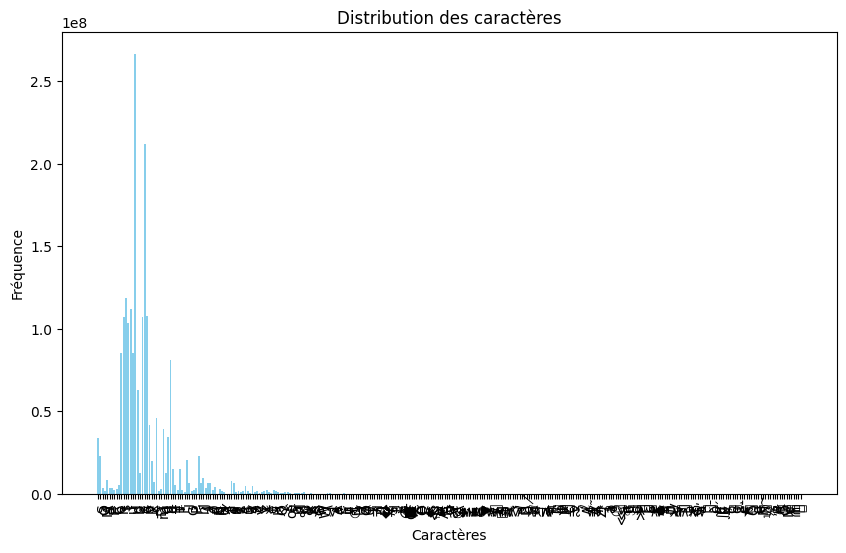

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

def distribution_caracteres(strings):
    str_compteur = Counter()
    for string in tqdm(strings):
        str_compteur.update(string)
    return str_compteur

def plot_distrib_caracteres(distrib_caracteres):
    caracteres = list(distrib_caracteres.keys())
    comptes = list(distrib_caracteres.values())

    plt.figure(figsize=(10, 6))
    plt.bar(caracteres, comptes, color='skyblue')
    plt.xlabel('Caractères')
    plt.ylabel('Fréquence')
    plt.title('Distribution des caractères')
    plt.xticks(rotation=90)
    plt.show()

car_distrib = distribution_caracteres(liste_desdocs)
plot_distrib_caracteres(car_distrib)

100%|██████████| 7461/7461 [00:53<00:00, 138.55it/s]


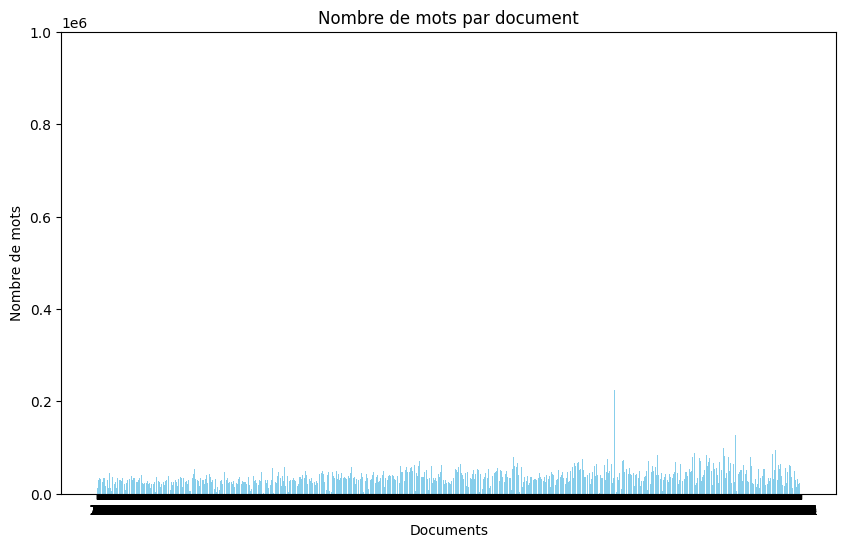

In [7]:
import matplotlib.pyplot as plt

def mots_par_doc(strings):
    return [len(string.split()) for string in tqdm(strings)]

def plot_mots_par_doc(compte_mots, y_max=None):
    document_indices = range(1, len(compte_mots) + 1)

    plt.figure(figsize=(10, 6))
    plt.bar(document_indices, compte_mots, color='skyblue')
    plt.xlabel('Documents')
    plt.ylabel('Nombre de mots')
    plt.title('Nombre de mots par document')
    plt.xticks(document_indices)
   
    if y_max is not None:
        plt.ylim(0, y_max)
    plt.show()
compte_mots = mots_par_doc(liste_desdocs)
plot_mots_par_doc(compte_mots, y_max=1000000)

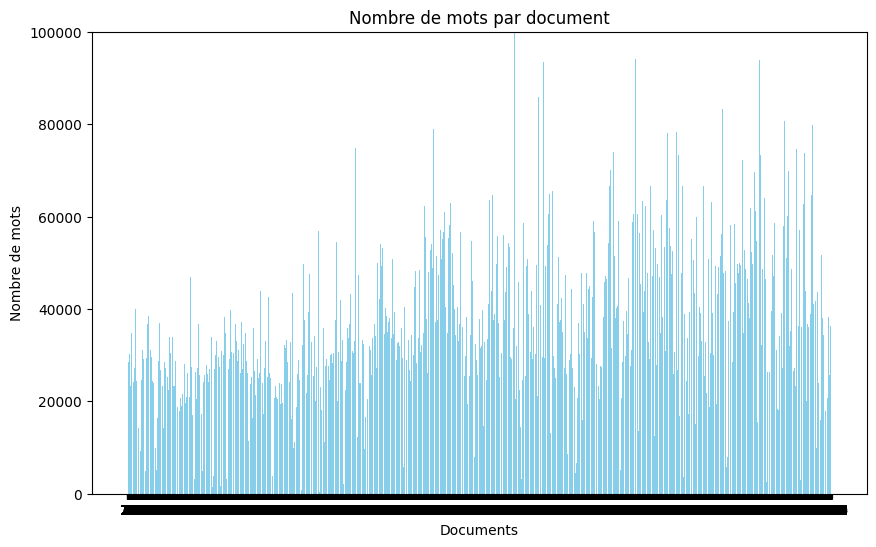

In [8]:
plot_mots_par_doc(compte_mots, y_max=100000)  


In [9]:
def mots_par_doc(strings):
    return [len(string.split()) for string in strings]

def dico_compteur(noms_docus, compteur_mots):
    return dict(zip(noms_docus, compteur_mots))

compte_mots = mots_par_doc(liste_desdocs)

dictionnaire_compte = dico_compteur(liste_desfichiers, word_counts)

print(dictionnaire_compte)

NameError: name 'word_counts' is not defined

In [ ]:
def min_max_compteur(doc_compte):
    min_doc = min(doc_w=doc_compte, key=doc_compte.get)
    max_doc = max(doc_compte, key=doc_compte.get)
    min_value = doc_compte[min_doc]
    max_value = doc_compte[max_doc]
    return (min_doc, min_value), (max_doc, max_value)



# Compter le nombre de mots par document
compte_mots = mots_par_doc(liste_desdocs)

# Créer le dictionnaire
doc_compte_mots = dico_compteur(liste_desfichiers, compte_mots)

# Trouver les valeurs min et max
(min_doc, min_value), (max_doc, max_value) = min_max_compteur(doc_compte_mots)

# Afficher le dictionnaire, et les valeurs min et max
print("Dictionnaire des comptes de mots par document:", doc_compte_mots)
print(f"Document avec le nombre minimum de mots: {min_doc} ({min_value} mots)")
print(f"Document avec le nombre maximum de mots: {max_doc} ({max_value} mots)")

Dictionnaire des comptes de mots par document: {'1881-01-11.txt': 5646, '1881-01-20.txt': 5990, '1881-01-21.txt': 9287, '1881-01-21_1.txt': 22493, '1881-01-22.txt': 21233, '1881-01-24.txt': 26850, '1881-01-25.txt': 24791, '1881-01-27.txt': 35053, '1881-01-31.txt': 28478, '1881-02-01.txt': 28222, '1881-02-03.txt': 13034, '1881-02-05.txt': 30235, '1881-02-07.txt': 24541, '1881-02-08.txt': 23608, '1881-02-10.txt': 28603, '1881-02-12.txt': 18343, '1881-02-14.txt': 28247, '1881-02-15.txt': 31480, '1881-02-17.txt': 21068, '1881-02-19.txt': 30597, '1881-02-21.txt': 12513, '1881-02-22.txt': 29908, '1881-02-24.txt': 29931, '1881-02-26.txt': 30612, '1881-03-03.txt': 27989, '1881-03-05.txt': 30318, '1881-03-07.txt': 26799, '1881-03-08.txt': 27102, '1881-03-10.txt': 31727, '1881-03-12.txt': 33331, '1881-03-14.txt': 1076, '1881-03-15.txt': 33805, '1881-03-17.txt': 35347, '1881-03-19.txt': 32246, '1881-03-21.txt': 27189, '1881-03-22.txt': 23269, '1881-03-24.txt': 27369, '1881-03-26.txt': 19532, '188

In [ ]:
def top_mots(doc_word_counts, n=20):
    sorted_word_counts = sorted(doc_word_counts.items(), key=lambda item: item[1], reverse=True)
    return sorted_word_counts[:n]


top_20_mots = top_mots(doc_compte_mots, n=30)

print("Dictionnaire des comptes de mots par document:", doc_word_counts)
print("\nLes 20 documents avec le plus de mots:")
for doc, count in top_20_word_counts:
    print(f"{doc}: {count} mots")


Dictionnaire des comptes de mots par document: {'1881-01-11.txt': 5646, '1881-01-20.txt': 5990, '1881-01-21.txt': 9287, '1881-01-21_1.txt': 22493, '1881-01-22.txt': 21233, '1881-01-24.txt': 26850, '1881-01-25.txt': 24791, '1881-01-27.txt': 35053, '1881-01-31.txt': 28478, '1881-02-01.txt': 28222, '1881-02-03.txt': 13034, '1881-02-05.txt': 30235, '1881-02-07.txt': 24541, '1881-02-08.txt': 23608, '1881-02-10.txt': 28603, '1881-02-12.txt': 18343, '1881-02-14.txt': 28247, '1881-02-15.txt': 31480, '1881-02-17.txt': 21068, '1881-02-19.txt': 30597, '1881-02-21.txt': 12513, '1881-02-22.txt': 29908, '1881-02-24.txt': 29931, '1881-02-26.txt': 30612, '1881-03-03.txt': 27989, '1881-03-05.txt': 30318, '1881-03-07.txt': 26799, '1881-03-08.txt': 27102, '1881-03-10.txt': 31727, '1881-03-12.txt': 33331, '1881-03-14.txt': 1076, '1881-03-15.txt': 33805, '1881-03-17.txt': 35347, '1881-03-19.txt': 32246, '1881-03-21.txt': 27189, '1881-03-22.txt': 23269, '1881-03-24.txt': 27369, '1881-03-26.txt': 19532, '188

In [ ]:
def mini_mots(doc_compte, n=20):
    mots_tri = sorted(doc_compte.items(), key=lambda item: item[1])
    return mots_tri[:n]

mini_mots_20 = mini_mots(doc_compte_mots, n=40)

print("Dictionnaire des comptes de mots par document:", doc_compte_mots)
print("\nLes 20 documents avec le moins de mots:")
for doc, count in mini_mots_20:
    print(f"{doc}: {count} mots")


Dictionnaire des comptes de mots par document: {'1881-01-11.txt': 5646, '1881-01-20.txt': 5990, '1881-01-21.txt': 9287, '1881-01-21_1.txt': 22493, '1881-01-22.txt': 21233, '1881-01-24.txt': 26850, '1881-01-25.txt': 24791, '1881-01-27.txt': 35053, '1881-01-31.txt': 28478, '1881-02-01.txt': 28222, '1881-02-03.txt': 13034, '1881-02-05.txt': 30235, '1881-02-07.txt': 24541, '1881-02-08.txt': 23608, '1881-02-10.txt': 28603, '1881-02-12.txt': 18343, '1881-02-14.txt': 28247, '1881-02-15.txt': 31480, '1881-02-17.txt': 21068, '1881-02-19.txt': 30597, '1881-02-21.txt': 12513, '1881-02-22.txt': 29908, '1881-02-24.txt': 29931, '1881-02-26.txt': 30612, '1881-03-03.txt': 27989, '1881-03-05.txt': 30318, '1881-03-07.txt': 26799, '1881-03-08.txt': 27102, '1881-03-10.txt': 31727, '1881-03-12.txt': 33331, '1881-03-14.txt': 1076, '1881-03-15.txt': 33805, '1881-03-17.txt': 35347, '1881-03-19.txt': 32246, '1881-03-21.txt': 27189, '1881-03-22.txt': 23269, '1881-03-24.txt': 27369, '1881-03-26.txt': 19532, '188

In [ ]:
def moyenne(compte_mots):
    return sum(compte_mots) / len(compte_mots) if compte_mots else 0

moyenne_mots = moyenne(compte_mots)

print("Dictionnaire des comptes de mots par document:", doc_compte_mots)
print(f"\nNombre moyen de mots par document: {moyenne_mots:.2f} mots")

Dictionnaire des comptes de mots par document: {'1881-01-11.txt': 5646, '1881-01-20.txt': 5990, '1881-01-21.txt': 9287, '1881-01-21_1.txt': 22493, '1881-01-22.txt': 21233, '1881-01-24.txt': 26850, '1881-01-25.txt': 24791, '1881-01-27.txt': 35053, '1881-01-31.txt': 28478, '1881-02-01.txt': 28222, '1881-02-03.txt': 13034, '1881-02-05.txt': 30235, '1881-02-07.txt': 24541, '1881-02-08.txt': 23608, '1881-02-10.txt': 28603, '1881-02-12.txt': 18343, '1881-02-14.txt': 28247, '1881-02-15.txt': 31480, '1881-02-17.txt': 21068, '1881-02-19.txt': 30597, '1881-02-21.txt': 12513, '1881-02-22.txt': 29908, '1881-02-24.txt': 29931, '1881-02-26.txt': 30612, '1881-03-03.txt': 27989, '1881-03-05.txt': 30318, '1881-03-07.txt': 26799, '1881-03-08.txt': 27102, '1881-03-10.txt': 31727, '1881-03-12.txt': 33331, '1881-03-14.txt': 1076, '1881-03-15.txt': 33805, '1881-03-17.txt': 35347, '1881-03-19.txt': 32246, '1881-03-21.txt': 27189, '1881-03-22.txt': 23269, '1881-03-24.txt': 27369, '1881-03-26.txt': 19532, '188